# Grover adapt search

## context
- Grover's algorithm
- Quantum oracles for combinatorial optimization
- Using GAS with Qiskit

### Import cell

In [47]:
from qiskit import QuantumCircuit,transpile
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_circuit_layout
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from numpy import pi as pi
from qiskit.circuit.library import QFT
import pylatexenc
%matplotlib inline

### 6.1Quantum Oracles

This Section shows how to construct a Quantum Oracles to encoding the boolean function in QC

A case study of 3-qubits circuit;
- the first column of Oracle for boolean function takes value 101
- the second column of Oracle for boolean funciton take value 011
- Constructing the Oracle value:0 by X_gate-point-X_gate

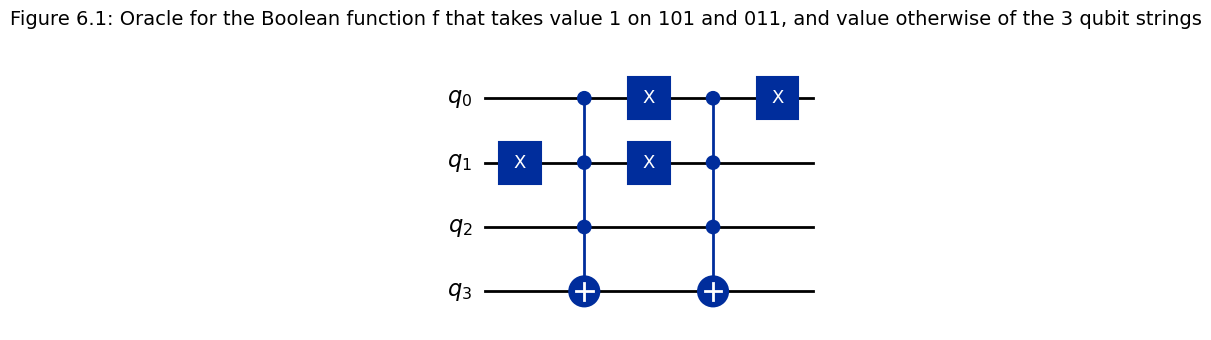

In [10]:
qc = QuantumCircuit(4)
qc.x(1)
qc.mcx([0,1,2],3)
qc.x(1)

qc.x(0)
qc.mcx([0,1,2],3)
qc.x(0)
sim = AerSimulator()
compiled = transpile(qc,sim)
fig = qc.draw("mpl")
fig.suptitle("Figure 6.1: Oracle for the Boolean function f that takes value 1 on 101 and 011, and value otherwise of the 3 qubit strings", fontsize=14)

# 显示图像
plt.show()

#### Exercise 6.2 
Construct a circuit for $O_f$ where $f$ is a 4-bit Boolean function that takes value 1 on
0111, 1110, and 0101, and value 0 on any other input

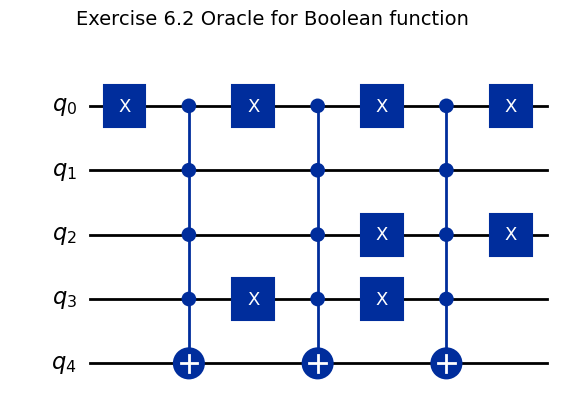

In [6]:
qc = QuantumCircuit(5)
qc.x(0)
qc.mcx([0,1,2,3],4)
qc.x(0)

qc.x(3)
qc.mcx([0,1,2,3],4)
qc.x(3)

qc.x([0,2])
qc.mcx([0,1,2,3],4)
qc.x([0,2])
sim = AerSimulator()
compiled = transpile(qc,sim)
fig = qc.draw("mpl")
fig.suptitle("Exercise 6.2 Oracle for Boolean function", fontsize=14)

# 显示图像
plt.show()

## 6.2Quantum oracles for combinatorial optimization

### 6.2.1 Quantum Flourier Transform (QFT)

#### Construct a QFT on 3-qubits circuit

swap_gate and H_gate inverse itselfs

and we need construc inverse QFT circuit to inverse whole circuit

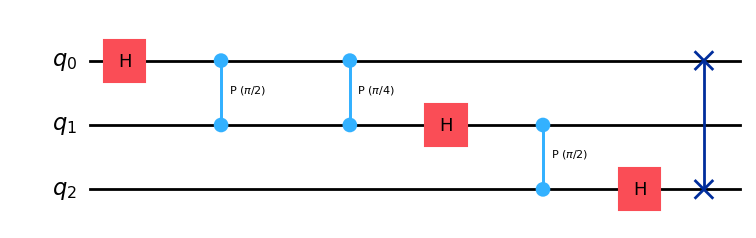

In [19]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cp(pi/2,1,0)
qc.cp(pi/4,1,0)
qc.h(1)
qc.cp(pi/2,1,2)
qc.h(2)
qc.swap(0,2)
sim = AerSimulator()
compiled = transpile(qc,sim)
fig = qc.draw("mpl")
#fig.suptitle("Figure6.4: Circuit for the quantum Fourier transform on 3 qubits", fontsize=14)

# 显示图像
plt.show()

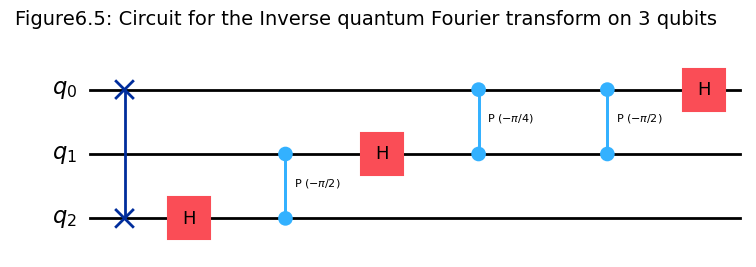

In [6]:
qc = QuantumCircuit(3)
qc.swap(0,2)
qc.h(2)
qc.cp(-pi/2,1,2)
qc.h(1)
qc.cp(-pi/4,1,0)
qc.cp(-pi/2,1,0)
qc.h(0)

fig = qc.draw("mpl")
fig.suptitle("Figure6.5: Circuit for the Inverse quantum Fourier transform on 3 qubits", fontsize=14)

# 显示图像
plt.show()

## 6.2.2 Enconding and adding integer numbers

Before Exercise this section shows how to coding the int into phase in QC **by two’s complement**

Encoding numbers from $-2^{(m-1)}$ to $2^{(m-1)}-1$ by using m-bit string
- A negative number x is represented by $2^{m}-x$
- if m = 4， we present 3 by 0011, and -5 by 1011
- positive numbers always start with 0, while negative numbers start with 1.

### Exercise 6.3

Using two7’s complement with 5 qubits, represent 10 and -7 and perfoem their addition:

m = 5, represent 10 and -7 and perform their addition
 
10 = 00110

-7 = 11101

3 =  00011

we will call the state:

$\frac{1}{\sqrt(2^m)} \sum_{k=1}^{2^m-1} exp(\frac{2 \pi i j k}{2^m}) |k \rangle$

the *phase encoding* of j

- the phase encoding of 0
- we want to add integer $l$ to it
- we just neet to apply the gates
  
 ---$P(\pi l)$---

  ---$P(\frac{\pi}{2} l)$---
  
  --$P(\frac{\pi}{2^{m-2}} l)$--
  
  --$P(\frac{\pi}{2^{{m-1}}} l)$--

Exercise 6.4 Derive a circuit that prepare the phase representation of 0,

add 6 and substracts 4

Use 4 qubits

Anser: Circuit for preparing the phase representation of 0, adding 6 and substrcacting 5

--H--P($6\pi$)--P($-4\pi$)--

--H--P($6\frac{\pi}{2}$)--P($-4\frac{\pi}{2}$)--

--H--P($6\frac{\pi}{4}$)--P($-4\frac{\pi}{4}$)--

--H--P($6\frac{\pi}{8}$)--P($-4\frac{\pi}{8}$)--

## 6.2.3 Computing the whole polynomial

g(x) = 3x₀x₁ - 2x₁x₂ + 1

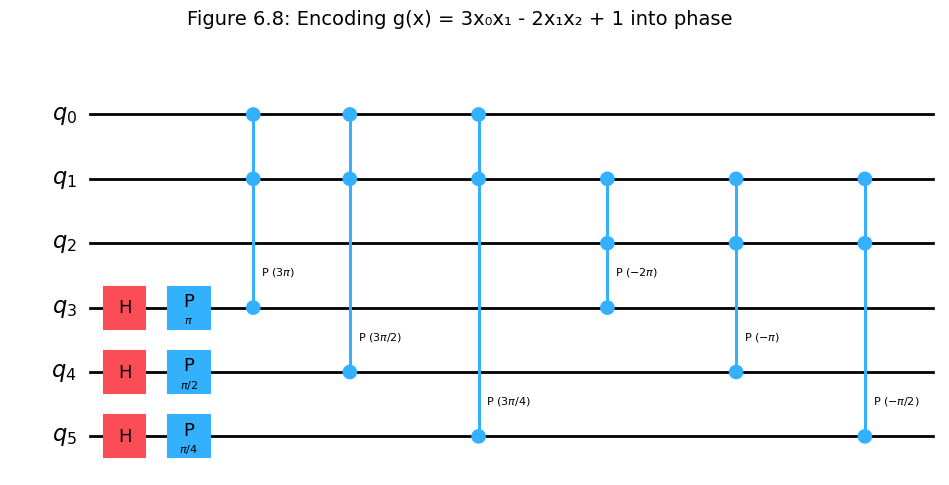

In [20]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PhaseGate
import numpy as np
import matplotlib.pyplot as plt

qc = QuantumCircuit(6)

# Label qubit names for clarity
x = [0, 1, 2]  # x0, x1, x2
f = [3, 4, 5]  # result register for phase encoding

# Step 1: Initialize result register in QFT basis
for q in f:
    qc.h(q)

# Step 2: Add constant +1 to result (unconditionally)
angles = [np.pi, np.pi/2, np.pi/4]  # phase rotations for adding +1
for i, theta in enumerate(angles):
    qc.p(theta, f[i])

# Step 3: Add +3 * x0 x1 term (controlled add 3 if x0 & x1 == 1)
angles = [3*np.pi, 3*np.pi/2, 3*np.pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x[0], x[1]], f[i])  # controlled on x0 and x1

# Step 4: Subtract 2 * x1 x2 term (controlled subtract 2 if x1 & x2 == 1)
angles = [-2*np.pi, -2*np.pi/2, -2*np.pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x[1], x[2]], f[i])  # controlled on x1 and x2

# Display the circuit
fig = qc.draw('mpl')
fig.suptitle("Figure 6.8: Encoding g(x) = 3x₀x₁ - 2x₁x₂ + 1 into phase", fontsize=14)
plt.show()


### Exercise 6.5
Design a circuit for computing $ x_1x_2 - 3x_0 +2 $ in phase encoding. Use multi-qubit and multi-controlled gates

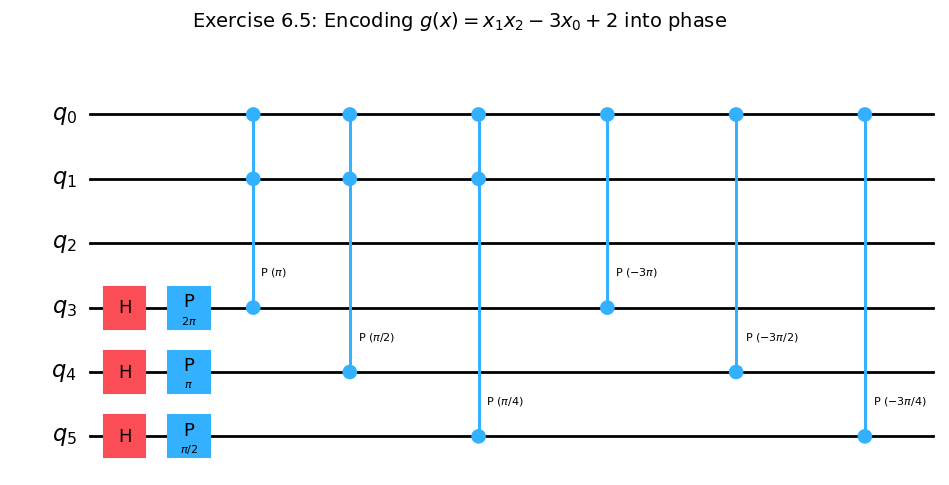

In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PhaseGate
import numpy as np
import matplotlib.pyplot as plt

qc = QuantumCircuit(6)

# Label qubit names for clarity
x = [0, 1, 2]  # x0, x1, x2
f = [3, 4, 5]  # result register for phase encoding

# Step 1: Initialize result register in QFT basis
for q in f:
    qc.h(q)

# Step 2: Add constant +1 to result (unconditionally)
angles = [2*pi, pi, np.pi/2]  # phase rotations for adding +1
for i, theta in enumerate(angles):
    qc.p(theta, f[i])

# Step 3: Add +3 * x0 x1 term (controlled add 3 if x0 & x1 == 1)
angles = [pi, pi/2, pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x[0], x[1]], f[i])  # controlled on x0 and x1

# Step 4: Subtract 2 * x1 x2 term (controlled subtract 2 if x1 & x2 == 1)
angles = [-3*np.pi, -3*np.pi/2, -3*np.pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x[0]], f[i])  # controlled on x1 and x2

# Display the circuit
fig = qc.draw('mpl')
fig.suptitle("Exercise 6.5: Encoding $g(x) = x_1x_2 - 3x_0 + 2$ into phase", fontsize=14)
plt.show()


## 6.2.4 Constructing the oracle

- Dürr-Høyer algorithm:
  - we want to implement an oracle that, given 𝑥 and 𝑦, returns whether 𝑔(𝑥) < 𝑔(𝑦) or not.

C:\Users\Saru\AppData\Local\Temp\ipykernel_27148\591559529.py:28: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_dg = QFT(3, inverse=True, do_swaps=False).to_gate(label="QFT†")


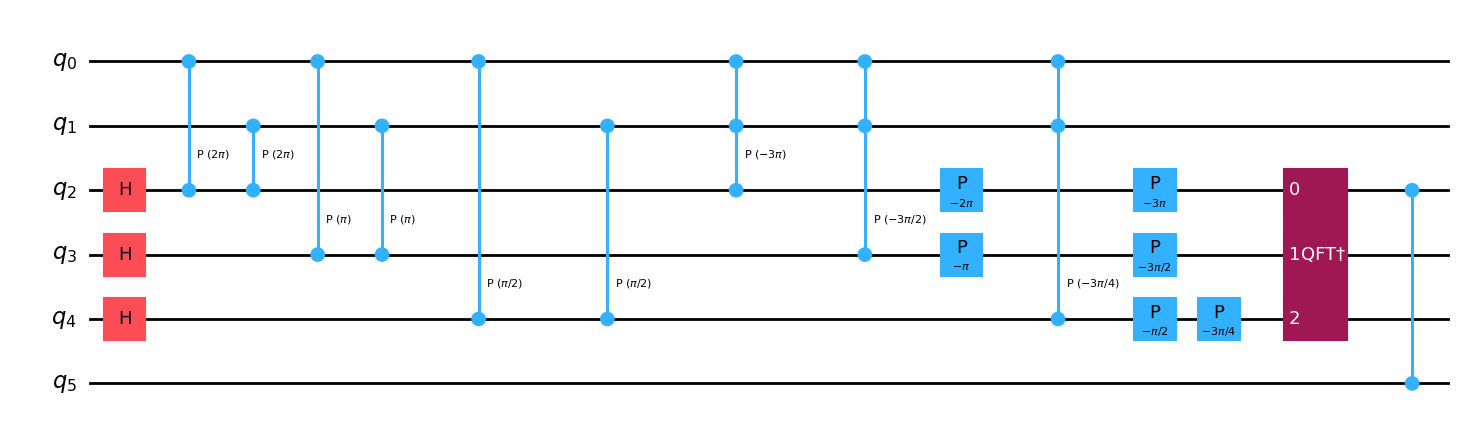

In [ ]:
qc = QuantumCircuit(6)
x = [0]
y = [1]
f = [2,3,4]
z = 5

for q in f:
    qc.h(q)

#Create circuit: f(x) = 2x + 2y - 3xy
#2x+2y
angles = [2*pi, 2*pi /2, 2*np.pi/4]
for i , theta in enumerate(angles):
    qc.cp(theta,x,f[i])
    qc.cp(theta,y,f[i])
#-3xy
angles = [-3*pi, -3*pi /2, -3*np.pi/4]
for i , theta in enumerate(angles):
    qc.mcp(theta,[x,y],f[i])

for i, theta in enumerate([2*np.pi, 2*np.pi/2, 2*np.pi/4]):
    qc.p(-theta, f[i])
for i, theta in enumerate([-3*np.pi, -3*np.pi/2, -3*np.pi/4]):
    qc.p(theta, f[i])  # -(-3xy)


# Step 4: QFT inverse
qft_dg = QFT(3, inverse=True, do_swaps=False).to_gate(label="QFT†")
qc.append(qft_dg, f)

qc.cz(f[0],5)

fig = qc.draw("mpl")
# 显示图像
plt.show()

## Uncompute Circuit

C:\Users\Saru\AppData\Local\Temp\ipykernel_27148\2888660369.py:30: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_dg = QFT(3, inverse=True, do_swaps=False).to_gate(label="$QFT^{dg}$")
C:\Users\Saru\AppData\Local\Temp\ipykernel_27148\2888660369.py:35: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3,inverse=False,do_swaps=False).to_gate(label="$QFT$"),f)


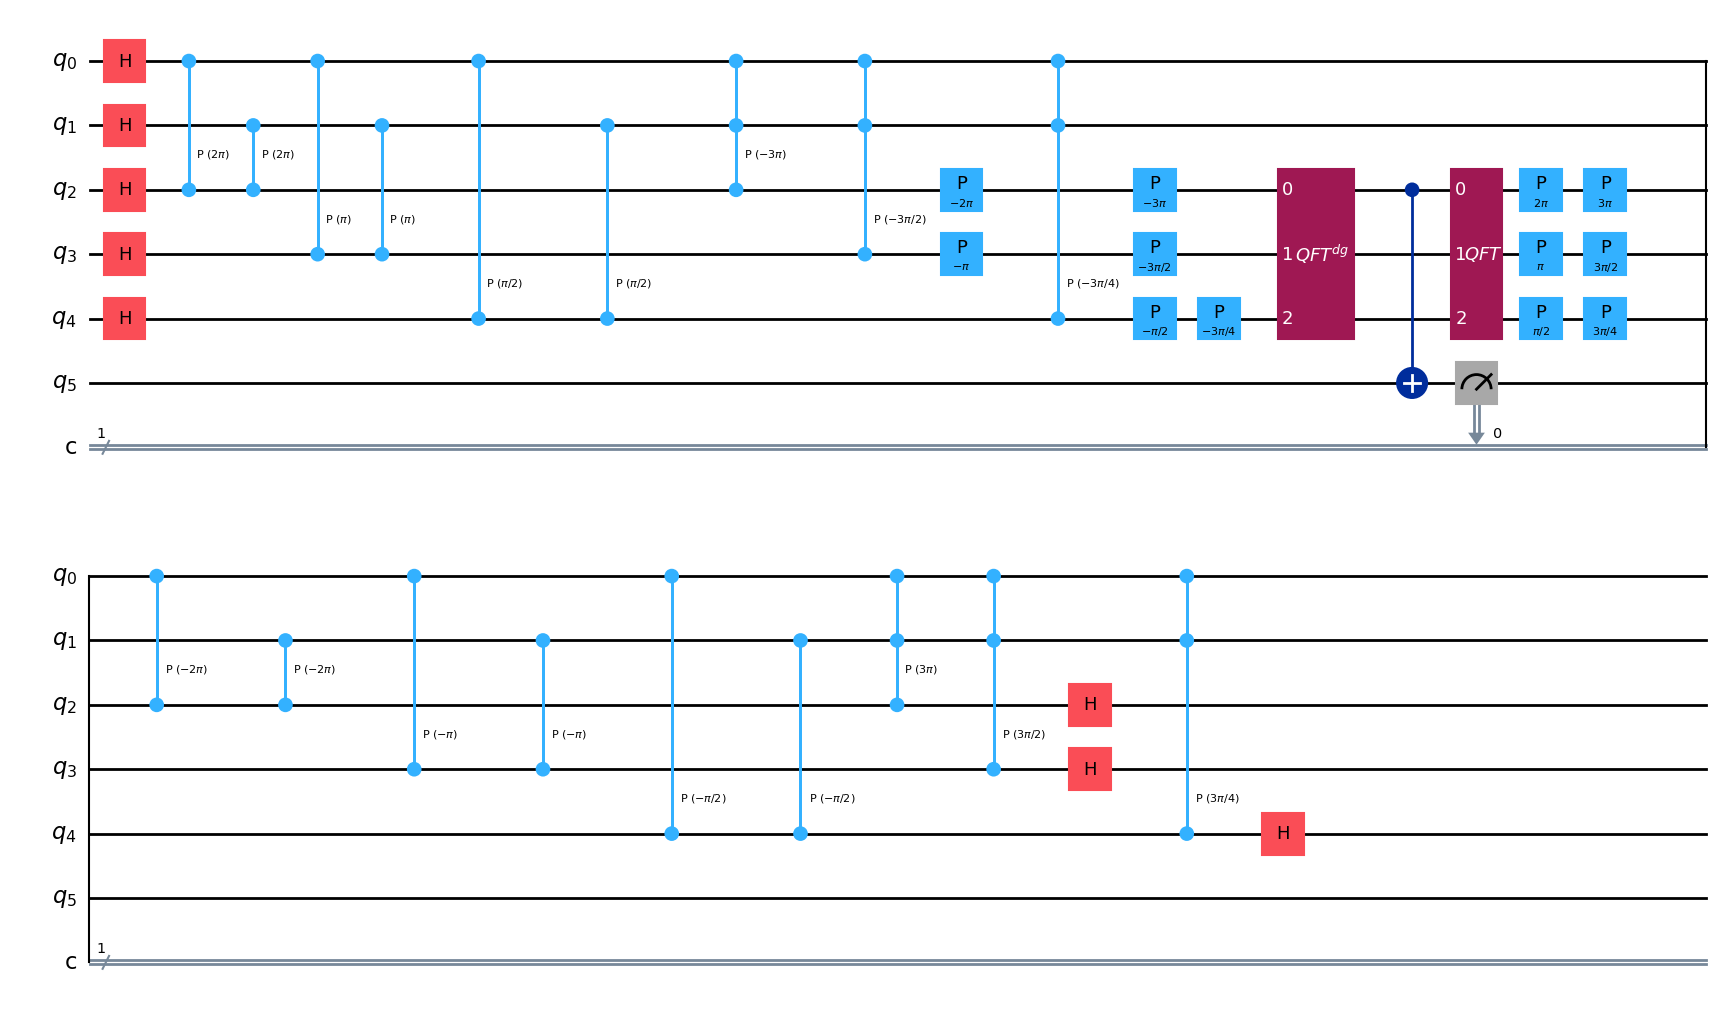

In [76]:
qc = QuantumCircuit(6,1)
x = [0]
y = [1]
f = [2,3,4]
z = 5
for q in range(2):
    qc.h(q)
for q in f:
    qc.h(q)

#Create circuit: g(x) = 2x + 2y - 3xy
#2x+2y
angles = [2*pi, 2*pi /2, 2*np.pi/4]
for i , theta in enumerate(angles):
    qc.cp(theta,x,f[i])
    qc.cp(theta,y,f[i])
#-3xy
angles = [-3*pi, -3*pi /2, -3*np.pi/4]
for i , theta in enumerate(angles):
    qc.mcp(theta,[x,y],f[i])

#Create circuit: f(x) = 1,1
for i, theta in enumerate([2*np.pi, 2*np.pi/2, 2*np.pi/4]):
    qc.p(-theta, f[i])
for i, theta in enumerate([-3*np.pi, -3*np.pi/2, -3*np.pi/4]):
    qc.p(theta, f[i])  # -(-3xy)


# Step 4: QFT inverse
qft_dg = QFT(3, inverse=True, do_swaps=False).to_gate(label="$QFT^{dg}$")
qc.append(qft_dg, f)

qc.cx(f[0],5)

qc.append(QFT(3,inverse=False,do_swaps=False).to_gate(label="$QFT$"),f)

# Step 7: 加回 f(y)
for i, theta in enumerate([2*np.pi, 2*np.pi/2, 2*np.pi/4]):
    qc.p(theta, f[i])
for i, theta in enumerate([-3*np.pi, -3*np.pi/2, -3*np.pi/4]):
    qc.p(-theta, f[i])

# Step 8: 减回 f(x)
angles = [-2*np.pi, -2*np.pi/2, -2*np.pi/4]
for i, theta in enumerate(angles):
    qc.cp(theta, x, f[i])
    qc.cp(theta, y, f[i])
angles = [3*np.pi, 3*np.pi/2, 3*np.pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x,y], f[i])

for q in f:
    qc.h(q)

qc.measure(5,0)
fig = qc.draw("mpl")
# 显示图像
plt.show()

In [88]:
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print(counts)

{'0': 255, '1': 769}


## 6.3 Implementing the Grover Adaptive Search in Qiskit

In [29]:
from qiskit_optimization import QuadraticProgram
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.circuit.library import QFT

In [ ]:
qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.minimize(linear=[2, 2], quadratic={(0, 1): -3})

In [11]:
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: 2 x + 2 y + [ - 6 x*y ]/2
Subject To

Bounds
 0 <= x <= 1
 0 <= y <= 1

Binaries
 x y
End



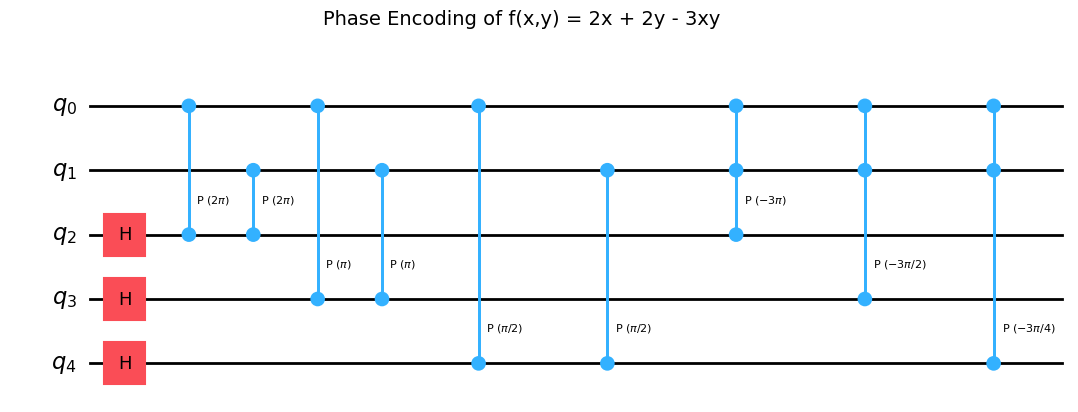

In [12]:
qc = QuantumCircuit(5)  # 2 for x,y + 3 for result

x = [0, 1]  # q0 = x, q1 = y
f = [2, 3, 4]  # q2~q4 = phase register

# Step 1: 初始化 phase encoding 到 |0⟩ → QFT basis
for q in f:
    qc.h(q)

# Step 2: 线性项 → 2x + 2y
angles = [2*np.pi, 2*np.pi/2, 2*np.pi/4]  # Add 2 → phase gates
for i, theta in enumerate(angles):
    qc.cp(theta, x[0], f[i])  # 2x
    qc.cp(theta, x[1], f[i])  # 2y

# Step 3: 二次项 → -3xy
angles = [-3*np.pi, -3*np.pi/2, -3*np.pi/4]
for i, theta in enumerate(angles):
    qc.mcp(theta, [x[0], x[1]], f[i])  # controlled on x and y

# Draw the circuit
fig = qc.draw('mpl')
fig.suptitle("Phase Encoding of f(x,y) = 2x + 2y - 3xy", fontsize=14)
plt.show()

In [30]:
def f_val(x0, x1):
    return 2 * x0 + 2 * x1 - 3 * x0 * x1

def create_gas_circuit(y_val):
    """构建 GAS 电路，对比 f(x) < f(y_val) 并完成一次 Grover 叠加放大"""
    qc = QuantumCircuit(5, 2)  # q0, q1: x; q2, q3, q4: phase reg; no z qubit
    x = [0, 1]
    f = [2, 3, 4]

    # Step 1: 叠加初始化 |+> for x
    qc.h(x)

    # Step 2: 初始化 phase register 为 |+>
    for q in f:
        qc.h(q)

    # Step 3: 加上 f(x) = 2x + 2y - 3xy
    angles = [2*np.pi, 2*np.pi/2, 2*np.pi/4]
    for i, theta in enumerate(angles):
        qc.cp(theta, x[0], f[i])
        qc.cp(theta, x[1], f[i])
    angles = [-3*np.pi, -3*np.pi/2, -3*np.pi/4]
    for i, theta in enumerate(angles):
        qc.mcp(theta, [x[0], x[1]], f[i])

    # Step 4: 减去 f(y)
    y0, y1 = y_val
    for i, theta in enumerate([2*np.pi, 2*np.pi/2, 2*np.pi/4]):
        if y0 == 1: qc.p(-theta, f[i])
        if y1 == 1: qc.p(-theta, f[i])
    for i, theta in enumerate([-3*np.pi, -3*np.pi/2, -3*np.pi/4]):
        if y0 == 1 and y1 == 1: qc.p(theta, f[i])

    # Step 5: 逆 QFT → 检查 MSB 反射（oracle）
    qc.append(QFT(3, inverse=True, do_swaps=False).to_gate(label='QFT†'), f)
    qc.z(f[0])  # 假设 f[0] 是 MSB → 相位反射（简化模拟）
    qc.append(QFT(3, do_swaps=False).to_gate(label='QFT'), f)

    # Step 6: 还原 oracle（uncompute）
    # 加回 f(y)
    for i, theta in enumerate([2*np.pi, 2*np.pi/2, 2*np.pi/4]):
        if y0 == 1: qc.p(theta, f[i])
        if y1 == 1: qc.p(theta, f[i])
    for i, theta in enumerate([-3*np.pi, -3*np.pi/2, -3*np.pi/4]):
        if y0 == 1 and y1 == 1: qc.p(-theta, f[i])
    # 减回 f(x)
    angles = [-2*np.pi, -2*np.pi/2, -2*np.pi/4]
    for i, theta in enumerate(angles):
        qc.cp(theta, x[0], f[i])
        qc.cp(theta, x[1], f[i])
    angles = [3*np.pi, 3*np.pi/2, 3*np.pi/4]
    for i, theta in enumerate(angles):
        qc.mcp(theta, [x[0], x[1]], f[i])

    # Step 7: Diffuser
    qc.h(x)
    qc.x(x)
    qc.h(x[1])
    qc.cx(x[0], x[1])
    qc.h(x[1])
    qc.x(x)
    qc.h(x)

    # Step 8: 测量
    qc.measure(x[0], 0)
    qc.measure(x[1], 1)

    return qc

def simulate_gas_once():
    backend = AerSimulator()

    best_y = [0, 0]  # 初始参考解
    best_val = f_val(*best_y)

    qc = create_gas_circuit(best_y)
    qc.draw("mpl")

    transpiled = transpile(qc, backend)
    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(transpiled,shots =1000).result()
    counts = result.get_counts()

    # 找到概率最大者
    max_result = max(counts.items(), key=lambda item: item[1])[0]
    x0, x1 = int(max_result[-2]), int(max_result[-1])  # 注意比特顺序
    new_val = f_val(x0, x1)

    print(f"测量得到: x = [{x0}, {x1}], f(x) = {new_val}")
    print(f"原参考 y = {best_y}, f(y) = {best_val}")

    if new_val < best_val:
        print("找到更优解！更新 y。")
        return [x0, x1], new_val
    else:
        print("未找到更优解。")
        return best_y, best_val


C:\Users\Saru\AppData\Local\Temp\ipykernel_29620\233814324.py:35: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3, inverse=True, do_swaps=False).to_gate(label='QFT†'), f)
C:\Users\Saru\AppData\Local\Temp\ipykernel_29620\233814324.py:37: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3, do_swaps=False).to_gate(label='QFT'), f)


测量得到: x = [1, 1], f(x) = 1
原参考 y = [0, 0], f(y) = 0
未找到更优解。


([0, 0], 0)

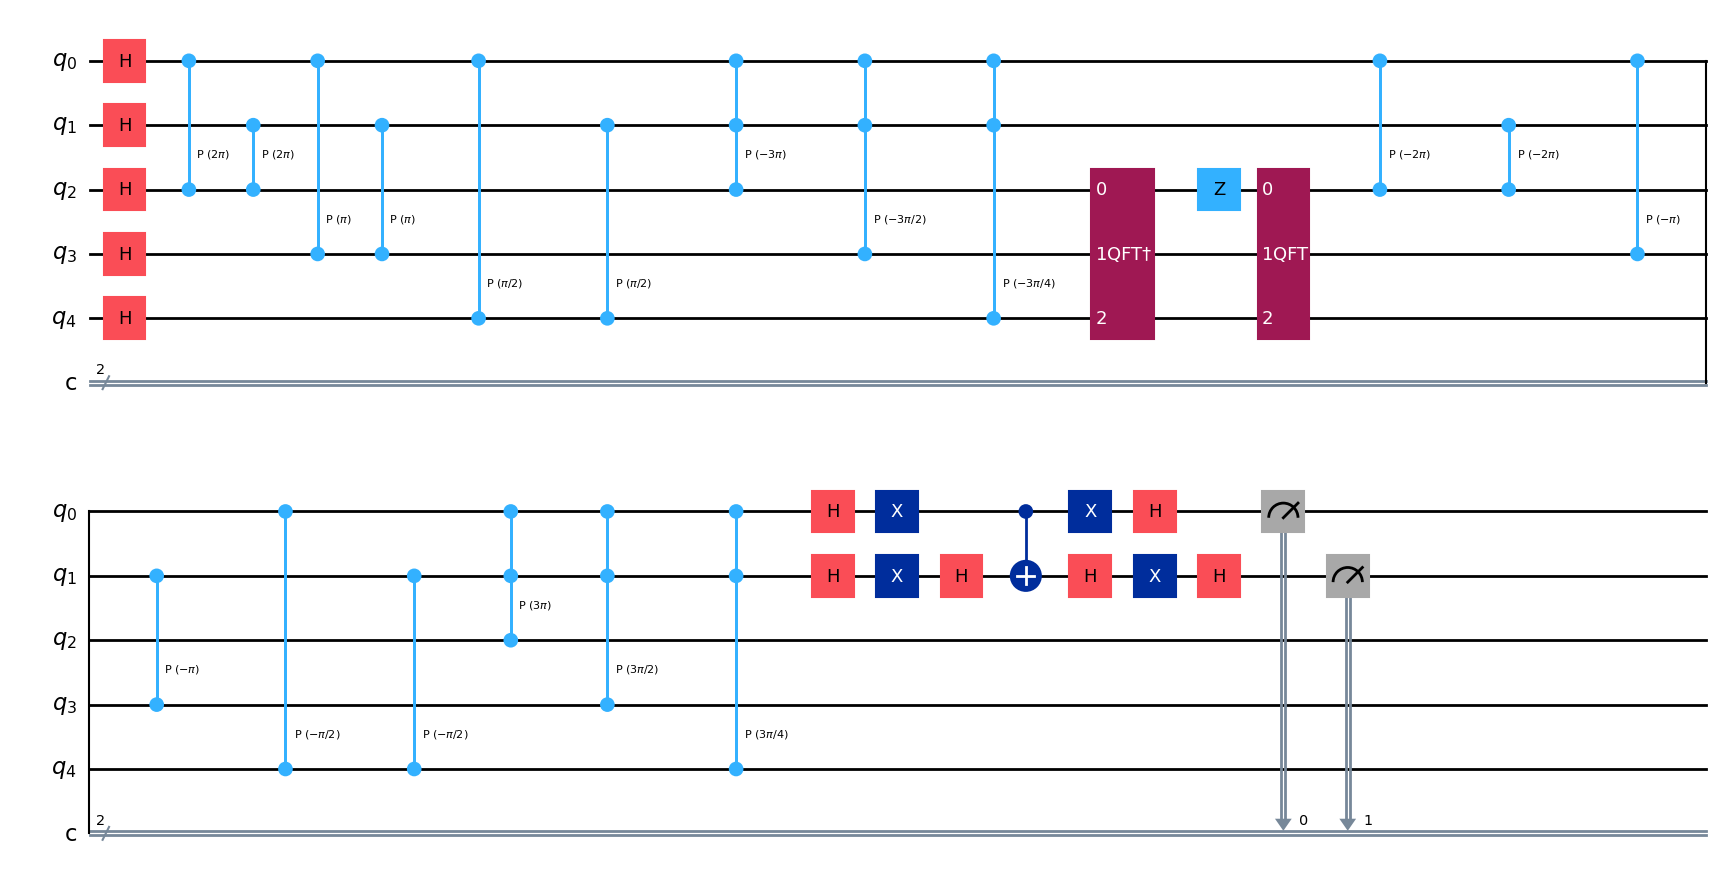

In [31]:
simulate_gas_once()